Zoher Ghadyali

Data Science 2016

Data Exploration - Warmup Project

In [96]:
import pandas as pd
import numpy as np
import thinkstats2
import thinkplot

%matplotlib inline

I used the 'train.csv' file for this data exploration just to develop an understanding of how to visualize this data and what each variable represented. Moving forward, I would like to use more data to see how my plots change, like in the 'test.csv' file.

In [97]:
train_df = pd.read_csv('train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


After looking at the dataframe above, I knew I would be interested in plotting people on the Titanic if I knew whether or they survived, their gender, the cost of their ticket, and their age. As a result, I used dropna() to eliminate any records where any of these variables that I cared about were NaN. So for example, Mr. James Moran, the 5th passenger in the above dataframe is no longer in df.

In [98]:
df = train_df.dropna(subset = ['Survived', 'Sex', 'Fare', 'Age'])

I then created two new dataframes, one for men and one for women on the Titanic in order to count how many men survived vs. how many women. I computed the percentage of men and women who survived and then produced a histogram that shows the count of men who survived vs. the count of women who survived. This data is all from 'train.csv' so more data would change these calculated percentages and the plot.

453
261
Percentage of men who survived 20.5298013245
Percentage of women who survived 75.4789272031


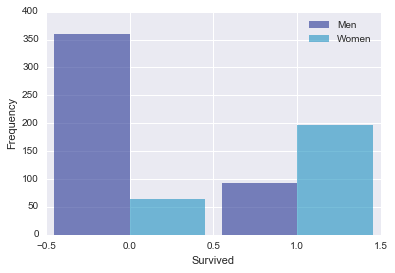

In [99]:
men = df[df.Sex == 'male']
women = df[df.Sex == 'female']

print len(men)
print len(women)
print 'Percentage of men who survived', (float(len(men[men.Survived == 1]))/len(men)) * 100
print 'Percentage of women who survived', (float(len(women[women.Survived == 1]))/len(women))*100

men_hist = thinkstats2.Hist(men.Survived)
women_hist = thinkstats2.Hist(women.Survived)
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(men_hist, align='right', width=width, label='Men')
thinkplot.Hist(women_hist, align='left', width=width, label='Women')
thinkplot.Show(xlabel='Survived', ylabel='Frequency')

As a result, 20.53% of the men on the Titanic in this data set survived and 75.48% of the women on the Titanic survived. One thing to note is that the plot above also shows that there are more men in this dataset than women and the histogram centered around 0 counts those who died and the histogram centered around 1 counts those who survived by gender. So this plot also shows that more women survived than men and way less women died than men who died in this dataset.

In the next cell, I separate the dataframe into the passengers who survived and the passengers who died using the Survived field. I then create a histogram of the survivors by age and a histogram of those who died by age. Below are the resulting plots.

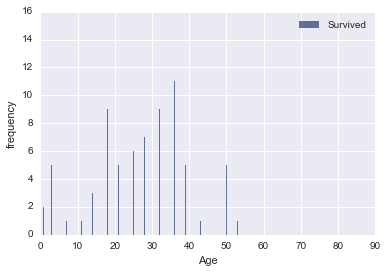

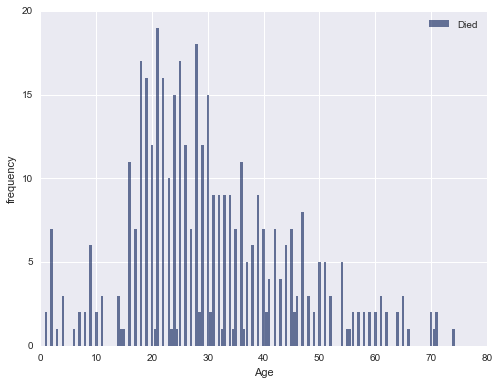

In [100]:
survivors = df[df.Survived == 1];
dead = df[df.Survived == 0];

survivors_hist = thinkstats2.Hist(survivors.Age)
dead_hist = thinkstats2.Hist(dead.Age)

thinkplot.Hist(survivors_hist, label='Survived')
thinkplot.Show(xlabel='Age', ylabel='frequency')

thinkplot.Hist(dead_hist, label='Died')
thinkplot.Show(xlabel='Age', ylabel='frequency')

Lookign at the survived plot, we see that the distribtuion kind of looks Gaussian centered around 25 or so while the distribution of the those who died also looks Gaussian with a rapidly declining left tail. This plot tells us that in this dataset, people under 55 or so had a chance of surviving the Titanic but the count of the dead at all ages seems to exceed the count of those who survived, even for children.

Below is the same data plotted as above using the distplot in Seaborn which draws a histogram and fits a kernel density estimate (KDE). The KDE plot encodes the density of observations on one axis with height along the other axis. This is more concise but arguably also more confusing to look at than the two previous plots.

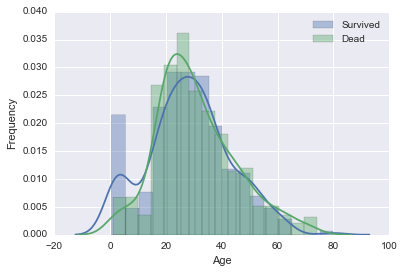

In [101]:
import seaborn
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

seaborn.distplot(survivors.Age, ax=ax, label='Survived')
seaborn.distplot(dead.Age, ax=ax, label='Dead')
plt.legend(['Survived', 'Dead'])
plt.ylabel('Frequency')

The plot above shows a small peak in ages 0 to 5 which shows that when the Titanic sunk, children were prioritized as survivors. We then see what looks like a regular Gaussian distribution apart from that peak for the kids in the left tail. If we look at the dead, we see a skewed Gaussian with less of a left tail which is good because it means less kids and young people died in the Titanic. The peak of the Gaussian for the dead is at 21 or so while the peak of the Gaussian for those who survived looks to be at about 25. We see that beyond 60, very few people survived in this data set.

Below is a scatterplot of the age and fare of the survivors. The fare is the cost of the ticket that the survivor purchased. Below that plot is a second scatterplot that plots the age and the fair of those who died on the Titanic in this dataset.

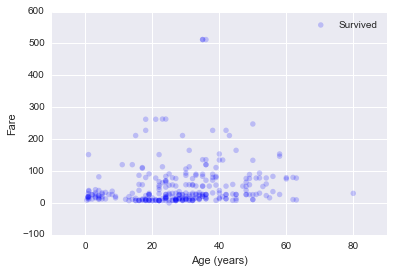

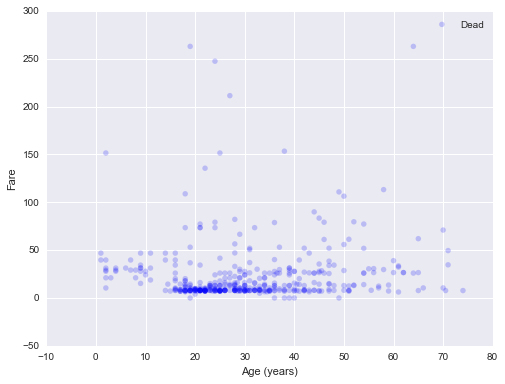

In [102]:
thinkplot.Scatter(survivors.Age, survivors.Fare, label='Survived')
thinkplot.Show(xlabel='Age (years)', ylabel='Fare')

thinkplot.Scatter(dead.Age, dead.Fare, label='Dead')
thinkplot.Show(xlabel='Age (years)', ylabel='Fare')

In the plot of the survivors, we see that the highest density of survivors is between the ages of 0 and 40. What is interesting to note is that these survivors also paid among the lowest fares for voyage on the Titanic. This means that poor young people are the highest density of survivors. If we look at the plot of those who did not survive, we see the highest density among the ages between 18 and 40. This highest density region also paid the lowest fare so poor people who were above the age of 18 were the highest density of those who did not survive in this dataset.

Below is a histogram of men by age who survived and died on the Titanic.

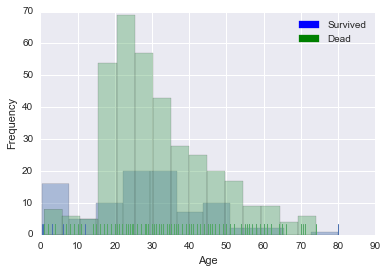

In [103]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots()

seaborn.distplot(survivors[survivors.Sex == 'male'].Age, kde=False, rug=True, ax=ax, label='Survived');
seaborn.distplot(dead[dead.Sex == 'male'].Age, kde=False, rug=True, ax=ax, label='Dead');

plt.legend(handles=[mpatches.Patch(color='blue', label='Survived'), mpatches.Patch(color='green', label='Dead')])
plt.ylabel('Frequency')

This histogram shows that among men on the Titanic, boys under the age of 10 were among the largest amount of survivors. The other group with a large amount of survivors were men between the ages of 25 and 40. Among the dead, there is a huge increase in the number of men who died from age 15 onwards, with the mode of the dead occurring at age 25 or so.

Below is a plot of the KDEs of women who survived on the Titanic and women who did not survive based on fare. I used fare as an estimate of wealth in this data exploration but I could also relate fair to the class the passenger was traveling in.

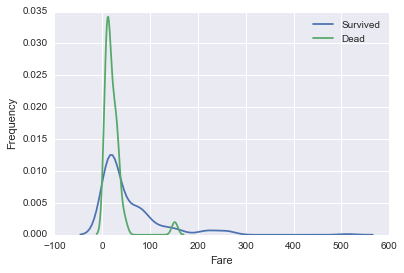

In [104]:
fig, ax = plt.subplots()

seaborn.kdeplot(survivors[survivors.Sex == 'female'].Fare, ax=ax, label='Survived')
seaborn.kdeplot(dead[dead.Sex == 'female'].Fare, ax=ax, label='Dead')
plt.xlabel('Fare')
plt.ylabel('Frequency')

We see that there is a peak among the survivors of people who paid close to 0 for their fare. However, we see a much sharper peak among the dead of people who paid close to 0. We then see that the KDE of the dead flattens out to approximately 0 as the fare rises, except for women who paid somewhere in the mid 150s for their fare. What this indicates is that although the peak of the survivors is close to a fare of 0, women who paid more for their fare survived with  very close to 0 of these women dying. One thing that explains the peaks is that there were a lot more passengers on the Titanic who were poorer so although the peaks for survivors occur at close to 0 fare, many more of these women died who also paid that amount of money for their ticket.

Below is another KDE plot of the survivors and those who died by the fare that they paid.

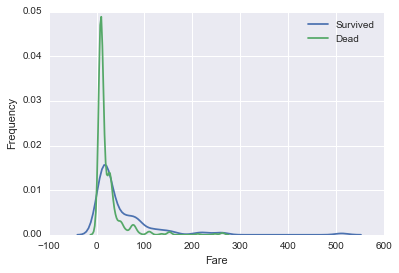

In [105]:
fig, ax = plt.subplots()

seaborn.kdeplot(survivors.Fare, ax=ax, label='Survived')
seaborn.kdeplot(dead.Fare, ax=ax, label='Dead')
plt.xlabel('Fare')
plt.ylabel('Frequency')

This KDE plot shows that among those who died, there is a very sharp peak close to 0 fare so those who paid less for their tickets and who I am assuming are poorer, were more likely not to survive the Titanic. Among those who survived, we see that there is a peak close to 0 fare which means some poor people did survive but almost twice as many people survived who paid more for their fare than people who died in the region from about 50 to 150. We then see that the frequency decreases beyond fares of 200 because very few people could afford to pay this fare so we cannot say much more about passengers who survived or died at higher fares without more data about them.